## **Importing Various Necessary Libraries**

In [4]:
import warnings
warnings.filterwarnings('ignore')

# data wrangling & pre-processing
import pandas as pd
import numpy as np

# data visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.model_selection import train_test_split


from scipy import stats

# **Importing Google Stock Price Data Set**
[Google Stock Price Data Set](https://finance.yahoo.com/quote/GOOG/history/?guccounter=1&guce_referrer=aHR0cHM6Ly93d3cuZ29vZ2xlLmNvbS8&guce_referrer_sig=AQAAALtRm22kpTDwOMnN2b_Z8UAzi0H0F8PtjTd8SyATYlfO7uDhkPnEGrtU1cAqA0rpceRou9nh8dHMUHh_LaXrZDCmUPo_6GkMDI9FaPuoz6OA5iYo-9jWkHxwP4uTFKRVOaOxgAeuy1OhppqrYv67lylGDCgcVwpST6tHFHkS90Uw)

In [11]:
from google.colab import files
uploaded = files.upload()

Saving GOOG1.csv to GOOG1.csv


# **Head and Tail of GOOGLE Stock Price Data Set**

In [ ]:
pd.read_csv("GOOG1.csv")

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-08-13,1236.979980,1249.272949,1233.640991,1235.010010,1235.010010,997300
1,2018-08-14,1235.189941,1245.869995,1225.109985,1242.099976,1242.099976,1348100
2,2018-08-15,1229.260010,1235.239990,1209.510010,1214.380005,1214.380005,1828800
3,2018-08-16,1224.729980,1226.000000,1202.550049,1206.489990,1206.489990,1343200
4,2018-08-17,1202.030029,1209.020020,1188.239990,1200.959961,1200.959961,1389600
...,...,...,...,...,...,...,...
247,2019-08-07,1156.000000,1178.444946,1149.624023,1173.989990,1173.989990,1444300
248,2019-08-08,1182.829956,1205.010010,1173.020020,1204.800049,1204.800049,1468000
249,2019-08-09,1197.989990,1203.880005,1183.603027,1188.010010,1188.010010,1065700
250,2019-08-12,1179.209961,1184.959961,1167.671997,1174.709961,1174.709961,1003000


In [ ]:
data = pd.read_csv("GOOG1.csv")

## **Various Information regarding the attributes present in the Data Set** 

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       252 non-null    object 
 1   Open       252 non-null    float64
 2   High       252 non-null    float64
 3   Low        252 non-null    float64
 4   Close      252 non-null    float64
 5   Adj Close  252 non-null    float64
 6   Volume     252 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 13.9+ KB


# **Importing yfinance package for Exploratory Data Analysis**

In [ ]:
!pip install yfinance
import yfinance as yf

In [ ]:
goog = yf.download('data')

[*********************100%***********************]  1 of 1 completed

1 Failed download:
- DATA: No data found, symbol may be delisted


# **EXPLORATORY DATA ANALYSIS**
***>Stock Price Trend from August-2018 to August-2019***




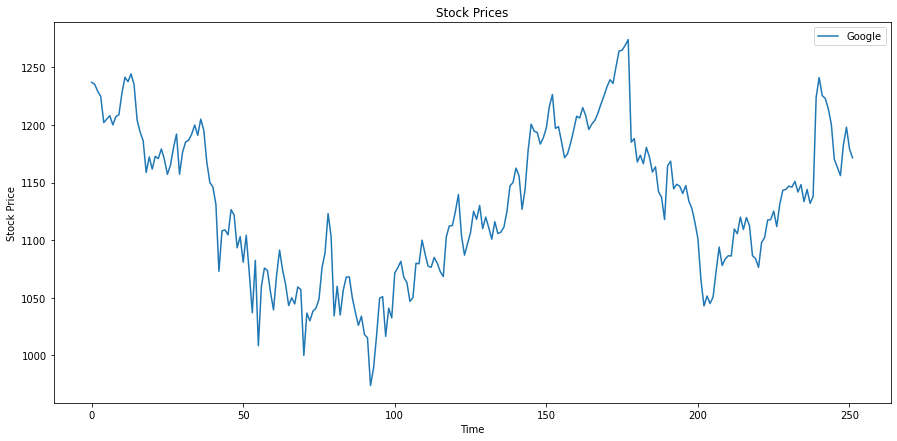

In [ ]:
data['Open'].plot(label = 'Google', figsize = (15,7))
plt.title('Stock Prices')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()

***>Volume of Stock Traded from August-2018 to August-2019***

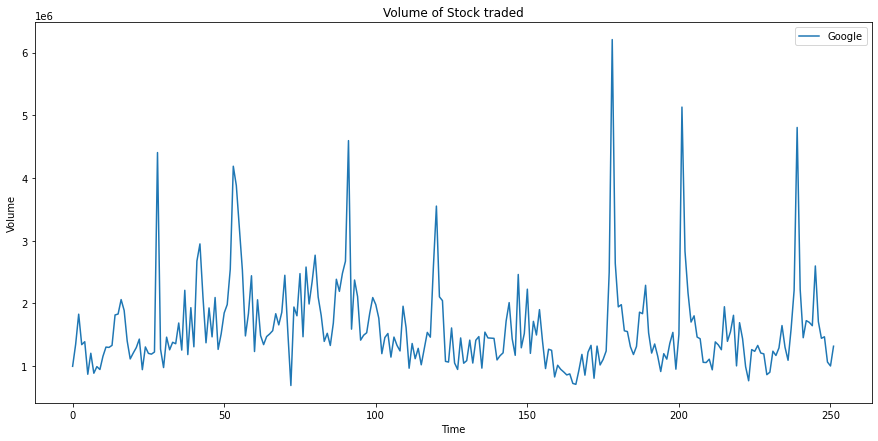

In [ ]:
data['Volume'].plot(label = 'Google', figsize = (15,7))
plt.title('Volume of Stock traded')
plt.xlabel('Time')
plt.ylabel('Volume')
plt.legend()

***>Market Capitalization of Google Stock***

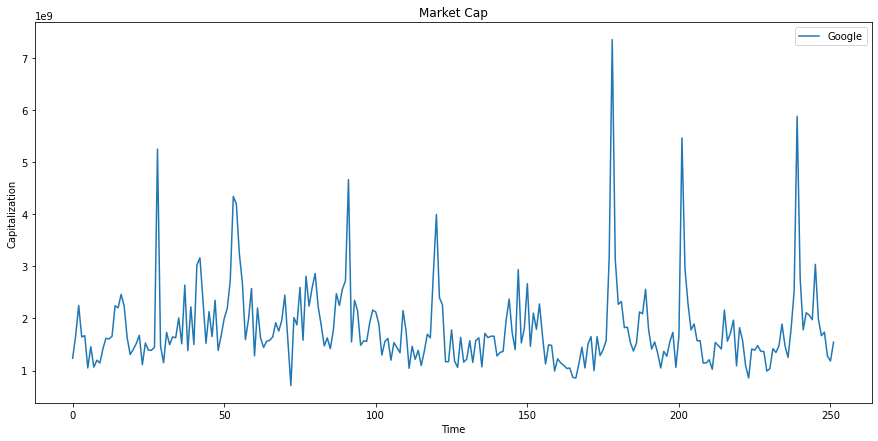

In [ ]:
data['MarktCap'] = data['Open'] * data['Volume']
data['MarktCap'].plot(label = 'Google', figsize = (15,7))
plt.title('Market Cap')
plt.xlabel('Time')
plt.ylabel('Capitalization')
plt.legend()

***>Percentage increase in stock value***

//This basically determines the volatility of a stock.

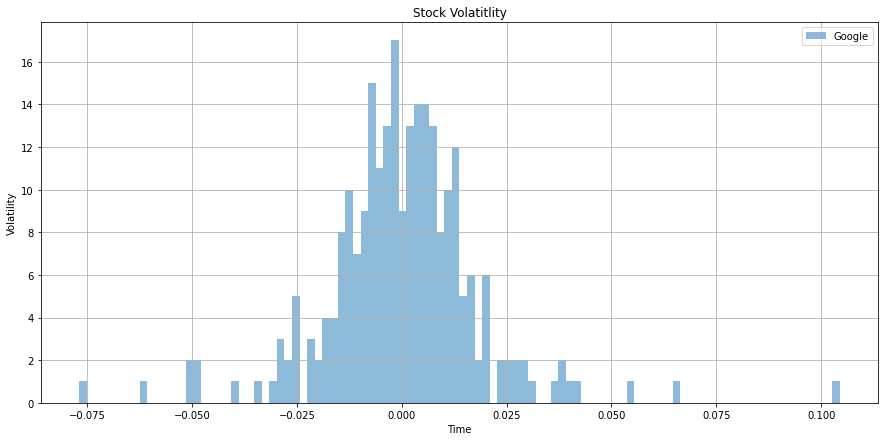

In [ ]:
data['returns'] = (data['Close']/data['Close'].shift(1)) -1
data['returns'].hist(bins = 100, label = 'Google', alpha = 0.5, figsize = (15,7))
plt.title('Stock Volatitlity')
plt.xlabel('Time')
plt.ylabel('Volatility')
plt.legend()


# **//End of Exploratory Data Analysis!**

# **Analysis of LSTM Model for Stock Price Prediction**:

In [5]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense,LSTM,Dropout
from google.colab import files
uploaded = files.upload()
data1 = pd.read_csv('trainData.csv') 
data1["Close"]=pd.to_numeric(data1.Close,errors='coerce') #turning the Close column to numeric
data1 = data1.dropna() #romeving the NA values
trainData = data1.iloc[:,4:5].values #selecting only the closing prices for training
sc = MinMaxScaler(feature_range=(0,1))
trainData = sc.fit_transform(trainData)
trainData.shape

Saving trainData.csv to trainData.csv


(1149, 1)

In [33]:
X_train = []
y_train = []

for i in range (60,1149): #60 : timestep // 1149 : length of the data
    X_train.append(trainData[i-60:i,0]) 
    y_train.append(trainData[i,0])

X_train,y_train = np.array(X_train),np.array(y_train)

In [34]:
X_train = np.reshape(X_train,(X_train.shape[0],X_train.shape[1],1)) #adding the batch_size axis
X_train.shape

(1089, 60, 1)

In [36]:
model = Sequential()

model.add(LSTM(units=100, return_sequences = True, input_shape =(X_train.shape[1],1)))
model.add(Dropout(0.2))

model.add(LSTM(units=100, return_sequences = True))
model.add(Dropout(0.2))

model.add(LSTM(units=100, return_sequences = True))
model.add(Dropout(0.2))

model.add(LSTM(units=100, return_sequences = False))
model.add(Dropout(0.2))

model.add(Dense(units =1))
model.compile(optimizer='adam',loss="mean_squared_error")

In [37]:
hist = model.fit(X_train, y_train, epochs = 20, batch_size = 32, verbose=2)

Epoch 1/20
35/35 - 14s - loss: 0.0299 - 14s/epoch - 397ms/step
Epoch 2/20
35/35 - 7s - loss: 0.0149 - 7s/epoch - 193ms/step
Epoch 3/20
35/35 - 7s - loss: 0.0124 - 7s/epoch - 192ms/step
Epoch 4/20
35/35 - 7s - loss: 0.0096 - 7s/epoch - 194ms/step
Epoch 5/20
35/35 - 7s - loss: 0.0078 - 7s/epoch - 195ms/step
Epoch 6/20
35/35 - 7s - loss: 0.0079 - 7s/epoch - 193ms/step
Epoch 7/20
35/35 - 7s - loss: 0.0067 - 7s/epoch - 192ms/step
Epoch 8/20
35/35 - 7s - loss: 0.0075 - 7s/epoch - 193ms/step
Epoch 9/20
35/35 - 7s - loss: 0.0064 - 7s/epoch - 193ms/step
Epoch 10/20
35/35 - 7s - loss: 0.0067 - 7s/epoch - 193ms/step
Epoch 11/20
35/35 - 7s - loss: 0.0073 - 7s/epoch - 193ms/step
Epoch 12/20
35/35 - 7s - loss: 0.0080 - 7s/epoch - 195ms/step
Epoch 13/20
35/35 - 7s - loss: 0.0053 - 7s/epoch - 195ms/step
Epoch 14/20
35/35 - 7s - loss: 0.0055 - 7s/epoch - 194ms/step
Epoch 15/20
35/35 - 7s - loss: 0.0058 - 7s/epoch - 193ms/step
Epoch 16/20
35/35 - 7s - loss: 0.0059 - 7s/epoch - 195ms/step
Epoch 17/20
35/

In [38]:
testData = pd.read_csv('GOOG1.csv') #importing the test data
testData["Close"]=pd.to_numeric(testData.Close,errors='coerce') #turning the close column to numerical type
testData = testData.dropna() #droping the NA values
testData = testData.iloc[:,4:5] #selecting the closing prices for testing
y_test = testData.iloc[60:,0:].values #selecting the labels 
#input array for the model
inputClosing = testData.iloc[:,0:].values 
inputClosing_scaled = sc.transform(inputClosing)
inputClosing_scaled.shape
X_test = []
length = len(testData)
timestep = 60
for i in range(timestep,length): #doing the same preivous preprocessing 
    X_test.append(inputClosing_scaled[i-timestep:i,0])
X_test = np.array(X_test)
X_test = np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))
X_test.shape

(192, 60, 1)

In [39]:
y_pred = model.predict(X_test) #predicting the new values

In [40]:
predicted_price = sc.inverse_transform(y_pred) #inversing the scaling transformation for ploting 

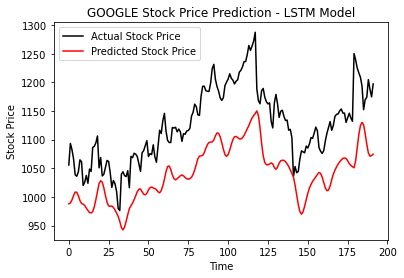

In [41]:
plt.plot(y_test, color = 'black', label = 'Actual Stock Price')
plt.plot(predicted_price, color = 'red', label = 'Predicted Stock Price')
plt.title('GOOGLE Stock Price Prediction - LSTM Model')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

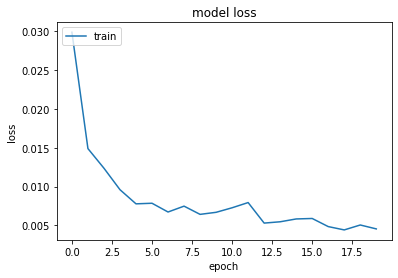

In [42]:
plt.plot(hist.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

In [52]:
import math 
MSE_error = mean_squared_error(y_test, predicted_price)
print('Testing Mean Squared Error is {}'.format(MSE_error))
print('The Root Mean Squared Error is:')
print(math.sqrt(MSE_error))

Testing Mean Squared Error is 7841.287562952592
The Root Mean Squared Error is:
88.55104495686425


# **Analysis of BI-LSTM Model for Stock Price Prediction**

In [56]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense,LSTM,Dropout
from google.colab import files
uploaded = files.upload()
data1 = pd.read_csv('trainData.csv') 
data1["Close"]=pd.to_numeric(data1.Close,errors='coerce') #turning the Close column to numeric
data1 = data1.dropna() #romeving the NA values
trainData = data1.iloc[:,4:5].values #selecting only the closing prices for training
sc = MinMaxScaler(feature_range=(0,1))
trainData = sc.fit_transform(trainData)
trainData.shape


Saving trainData.csv to trainData (1).csv


(1149, 1)

In [57]:
X_train = []
y_train = []

for i in range (60,1149): #60 : timestep // 1149 : length of the data
    X_train.append(trainData[i-60:i,0]) 
    y_train.append(trainData[i,0])

X_train,y_train = np.array(X_train),np.array(y_train)

In [58]:
X_train = np.reshape(X_train,(X_train.shape[0],X_train.shape[1],1)) #adding the batch_size axis
X_train.shape

(1089, 60, 1)

In [63]:
from keras.layers import Bidirectional
model = Sequential()

model.add(Bidirectional(LSTM(units=100, return_sequences = True, input_shape =(X_train.shape[1],1))))
model.add(Dropout(0.2))

model.add(Bidirectional(LSTM(units=100, return_sequences = True)))
model.add(Dropout(0.2))

model.add(Bidirectional(LSTM(units=100, return_sequences = True)))
model.add(Dropout(0.2))

model.add(Bidirectional(LSTM(units=100, return_sequences = False)))
model.add(Dropout(0.2))

model.add(Dense(units =1))
model.compile(optimizer='adam',loss="mean_squared_error")

In [64]:
hist = model.fit(X_train, y_train, epochs = 20, batch_size = 32, verbose=2)

Epoch 1/20
35/35 - 34s - loss: 0.0282 - 34s/epoch - 960ms/step
Epoch 2/20
35/35 - 17s - loss: 0.0087 - 17s/epoch - 488ms/step
Epoch 3/20
35/35 - 17s - loss: 0.0063 - 17s/epoch - 492ms/step
Epoch 4/20
35/35 - 17s - loss: 0.0045 - 17s/epoch - 487ms/step
Epoch 5/20
35/35 - 17s - loss: 0.0049 - 17s/epoch - 487ms/step
Epoch 6/20
35/35 - 17s - loss: 0.0053 - 17s/epoch - 485ms/step
Epoch 7/20
35/35 - 17s - loss: 0.0044 - 17s/epoch - 488ms/step
Epoch 8/20
35/35 - 17s - loss: 0.0070 - 17s/epoch - 487ms/step
Epoch 9/20
35/35 - 17s - loss: 0.0049 - 17s/epoch - 497ms/step
Epoch 10/20
35/35 - 17s - loss: 0.0042 - 17s/epoch - 486ms/step
Epoch 11/20
35/35 - 17s - loss: 0.0033 - 17s/epoch - 489ms/step
Epoch 12/20
35/35 - 17s - loss: 0.0041 - 17s/epoch - 492ms/step
Epoch 13/20
35/35 - 17s - loss: 0.0039 - 17s/epoch - 493ms/step
Epoch 14/20
35/35 - 17s - loss: 0.0037 - 17s/epoch - 493ms/step
Epoch 15/20
35/35 - 17s - loss: 0.0032 - 17s/epoch - 494ms/step
Epoch 16/20
35/35 - 17s - loss: 0.0032 - 17s/epoc

In [65]:
testData = pd.read_csv('GOOG1.csv') #importing the test data
testData["Close"]=pd.to_numeric(testData.Close,errors='coerce') #turning the close column to numerical type
testData = testData.dropna() #droping the NA values
testData = testData.iloc[:,4:5] #selecting the closing prices for testing
y_test = testData.iloc[60:,0:].values #selecting the labels 
#input array for the model
inputClosing = testData.iloc[:,0:].values 
inputClosing_scaled = sc.transform(inputClosing)
inputClosing_scaled.shape
X_test = []
length = len(testData)
timestep = 60
for i in range(timestep,length): #doing the same preivous preprocessing 
    X_test.append(inputClosing_scaled[i-timestep:i,0])
X_test = np.array(X_test)
X_test = np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))
X_test.shape

(192, 60, 1)

In [66]:
y_pred = model.predict(X_test) #predicting the new values

In [67]:
predicted_price = sc.inverse_transform(y_pred) #inversing the scaling transformation for ploting 

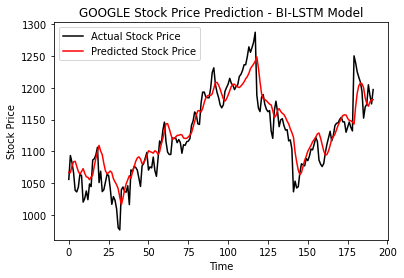

In [71]:
plt.plot(y_test, color = 'black', label = 'Actual Stock Price')
plt.plot(predicted_price, color = 'red', label = 'Predicted Stock Price')
plt.title('GOOGLE Stock Price Prediction - BI-LSTM Model')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

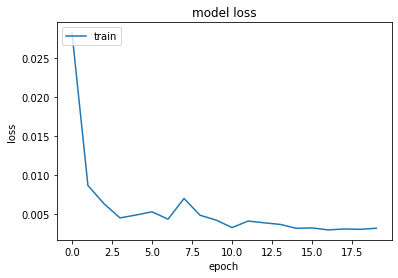

In [69]:
plt.plot(hist.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

In [70]:
import math 
MSE_error = mean_squared_error(y_test, predicted_price)
print('Testing Mean Squared Error is {}'.format(MSE_error))
print('The Root Mean Squared Error is:')
print(math.sqrt(MSE_error))

Testing Mean Squared Error is 694.1165805189056
The Root Mean Squared Error is:
26.346092319714238


# **Analysis of ARIMA Model for Stock Price Predcition**

In [20]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from pandas.plotting import lag_plot
from pandas import datetime
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving GOOG1.csv to GOOG1.csv


In [54]:
df = pd.read_csv("GOOG1.csv")
df.head(5)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-08-13,1236.979980,1249.272949,1233.640991,1235.010010,1235.010010,997300
1,2018-08-14,1235.189941,1245.869995,1225.109985,1242.099976,1242.099976,1348100
2,2018-08-15,1229.260010,1235.239990,1209.510010,1214.380005,1214.380005,1828800
3,2018-08-16,1224.729980,1226.000000,1202.550049,1206.489990,1206.489990,1343200
4,2018-08-17,1202.030029,1209.020020,1188.239990,1200.959961,1200.959961,1389600


In [55]:
import math
train_data, test_data = df[0:int(len(df)*0.7)], df[int(len(df)*0.7):]
training_data = train_data['Close'].values
test_data = test_data['Close'].values
history = [x for x in training_data]
model_predictions = []
N_test_observations = len(test_data)
for time_point in range(N_test_observations):
    model = ARIMA(history, order=(4,1,0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    model_predictions.append(yhat)
    true_test_value = test_data[time_point]
    history.append(true_test_value)
MSE_error = mean_squared_error(test_data, model_predictions)
print('Testing Mean Squared Error is {}'.format(MSE_error))
print('The Root Mean Squared Error is:')
print(math.sqrt(MSE_error))

Testing Mean Squared Error is 577.1712008754789
The Root Mean Squared Error is:
24.02438762748135


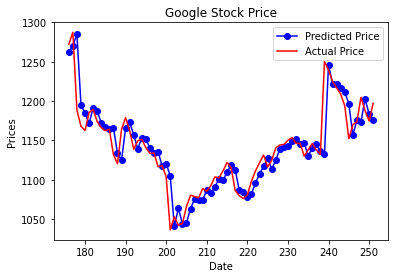

In [ ]:
test_set_range = df[int(len(df)*0.7):].index
plt.plot(test_set_range, model_predictions, color='blue', marker='o',label='Predicted Price')
plt.plot(test_set_range, test_data, color='red', label='Actual Price')
plt.title('Google Stock Price')
plt.xlabel('Date')
plt.ylabel('Prices')
plt.legend()
plt.show()